In [1]:
%load_ext autoreload
%autoreload 2
from hmpai.behaviour.sat2 import read_behavioural_info
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt
from hmpai.visualization import set_seaborn_style
DATA_PATH = Path(os.getenv("DATA_PATH"))

behaviour = read_behavioural_info(DATA_PATH / 'sat2/behavioural/df_full.csv')

In [ ]:
behaviour.FC.describe()
# 2 is high, 1 is low
# Keep low

count    43557.000000
mean         1.497578
std          0.500000
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: FC, dtype: float64

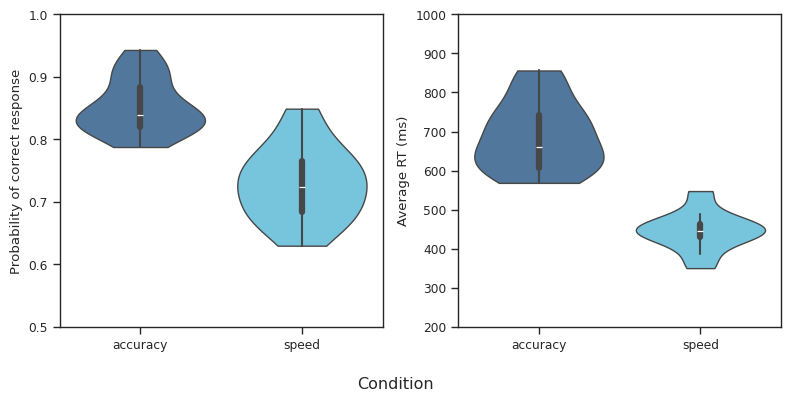

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your original dataset
set_seaborn_style()
df = behaviour
# Step 1: Calculate correct rates and average RT per participant across conditions
df['correct'] = df['expdResp'] == df['givenResp']

# Create a new dataframe for correct rates
correct_rates = df.groupby(['participant', 'SAT'])['correct'].mean().reset_index(name='correct_rate')

# Group the RT data similarly
rt_data = df.groupby(['participant', 'SAT'])['rt'].mean().reset_index(name='average_rt')

# Merge correct rates and RT into one dataframe for easier plotting
merged_data = pd.merge(correct_rates, rt_data, on=['participant', 'SAT'])

# Step 2: Create violin plots for average RTs and correct rates

# Set the figure size
fig, ax = plt.subplots(1, 2, figsize=(8,4))
# Plot the violin plot for correct rates
plt.subplot(1, 2, 1)
sns.violinplot(x='SAT', y='correct_rate', data=merged_data, inner='box', hue='SAT', cut=0, ax=ax[0])
# plt.title('Correct Rates per Participant across Conditions')
plt.ylim((0.5, 1))
plt.xlabel('')
fig.supxlabel('Condition')
plt.ylabel('Probability of correct response')

# Plot the violin plot for average RTs
plt.subplot(1, 2, 2)
sns.violinplot(x='SAT', y='average_rt', data=merged_data, inner='box', hue='SAT', cut=0, ax=ax[1])
# plt.title('Reaction time')
plt.ylim((200, 1000))
plt.xlabel('')
plt.ylabel('Average RT (ms)')

# Adjust the layout
plt.tight_layout()
plt.savefig("../../img/sat.svg", transparent=True)
plt.show()

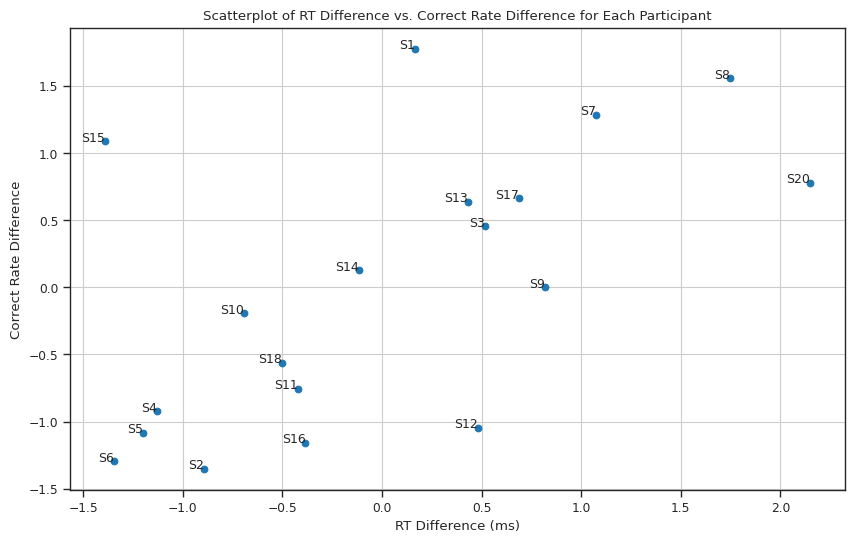

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `df` is your original DataFrame

# Step 1: Create a new column indicating whether the response was correct
df['correct'] = df['expdResp'] == df['givenResp']

# Step 2: Calculate the correct rate for each participant over both conditions
correct_rate = df.groupby(['participant', 'SAT'])['correct'].mean().reset_index()

# Step 3: Pivot the data to have SAT conditions as columns to compare them
correct_rate_pivot = correct_rate.pivot(index='participant', columns='SAT', values='correct').reset_index()

# Step 4: Calculate the difference in correct rate between conditions
correct_rate_pivot['Correct_Rate_Diff'] = correct_rate_pivot['accuracy'] - correct_rate_pivot['speed']

# Step 5: Calculate the average RT per condition, per participant
rt_means = df.groupby(['participant', 'SAT'])['rt'].mean().reset_index()

# Step 6: Pivot the RT means to get columns for 'speed' and 'accuracy'
rt_means_pivot = rt_means.pivot(index='participant', columns='SAT', values='rt').reset_index()

# Step 7: Calculate the difference in average RT between 'accuracy' and 'speed' conditions
rt_means_pivot['RT_Difference'] = rt_means_pivot['accuracy'] - rt_means_pivot['speed']

# Step 8: Merge the correct rate differences and RT differences into one DataFrame
merged_differences = pd.merge(correct_rate_pivot[['participant', 'Correct_Rate_Diff']], 
                              rt_means_pivot[['participant', 'RT_Difference']], 
                              on='participant')
merged_differences[['RT_Difference', 'Correct_Rate_Diff']] = scaler.fit_transform(merged_differences[['RT_Difference', 'Correct_Rate_Diff']])

# Step 9: Create the scatter plot with RT difference (X-axis) vs. Correct Rate difference (Y-axis)
plt.figure(figsize=(10, 6))
plt.scatter(merged_differences['RT_Difference'], merged_differences['Correct_Rate_Diff'], color='tab:blue', marker='o')

# Adding labels and title
plt.xlabel('RT Difference (ms)')
plt.ylabel('Correct Rate Difference')
plt.title('Scatterplot of RT Difference vs. Correct Rate Difference for Each Participant')

# Label each point with the participant name
for i, row in merged_differences.iterrows():
    plt.text(row['RT_Difference'], row['Correct_Rate_Diff'], row['participant'], fontsize=9, ha='right')

# Adding grid and displaying plot
plt.grid(True)
plt.show()


In [17]:
merged_differences

SAT,participant,Correct_Rate_Diff,RT_Difference
0,S1,1.776760,0.165378
1,S10,-0.193206,-0.692545
2,S11,-0.756311,-0.421166
3,S12,-1.045736,0.482139
4,S13,0.639003,0.430683
5,S14,0.127303,-0.114215
6,S15,1.088365,-1.389981
7,S16,-1.159978,-0.384122
8,S17,0.663192,0.686907
9,S18,-0.560755,-0.503932


/tmp/ipykernel_487054/2414391016.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(merged_differences_sorted['participant'])


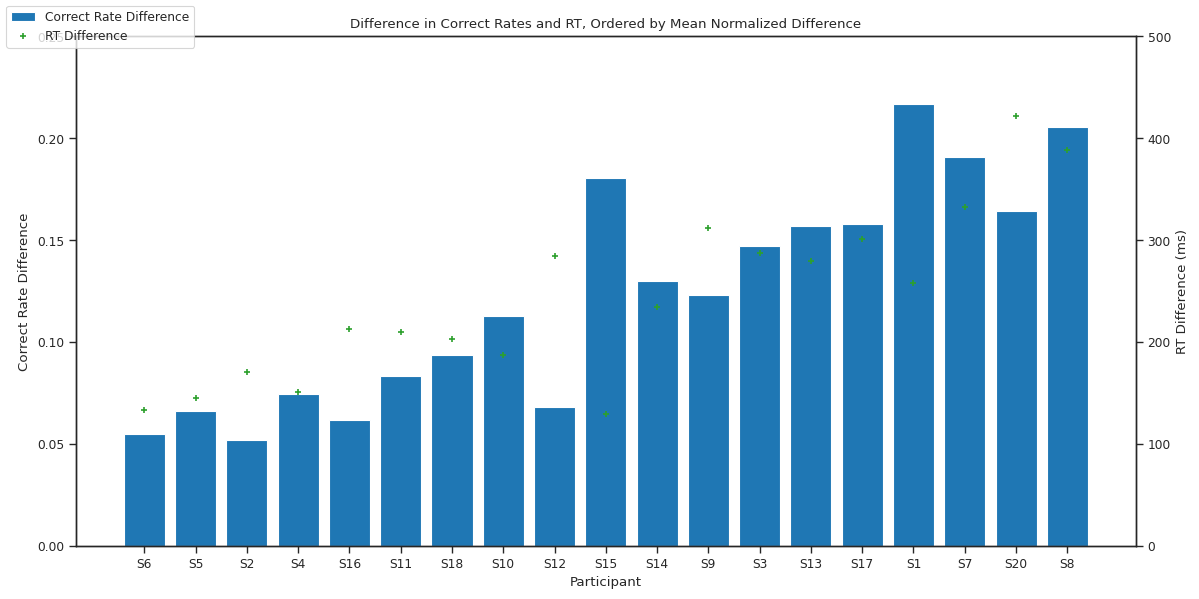

In [4]:
# Create a new column indicating whether the response was correct
df['correct'] = df['expdResp'] == df['givenResp']

# Calculate the correct rate for each participant over both conditions
correct_rate = df.groupby(['participant', 'SAT'])['correct'].mean().reset_index()

# Pivot the data so that we can have the SAT conditions as columns to compare them
correct_rate_pivot = correct_rate.pivot(index='participant', columns='SAT', values='correct').reset_index()

# Step 2: Calculate the difference in correct rate between conditions
correct_rate_pivot['Difference'] = correct_rate_pivot['accuracy'] - correct_rate_pivot['speed']
# Step 1: Calculate the difference in average RT per condition, per participant
# Group by participant and SAT condition, then calculate the mean RT
rt_means = df.groupby(['participant', 'SAT'])['rt'].mean().reset_index()

# Pivot the RT means to get columns for 'speed' and 'accuracy'
rt_means_pivot = rt_means.pivot(index='participant', columns='SAT', values='rt').reset_index()

# Calculate the difference in average RT between 'accuracy' and 'speed' conditions
rt_means_pivot['RT_Difference'] = rt_means_pivot['accuracy'] - rt_means_pivot['speed']

# Step 2: Merge the correct rate differences and RT differences into one DataFrame
merged_differences = pd.merge(correct_rate_pivot[['participant', 'Difference']], 
                              rt_means_pivot[['participant', 'RT_Difference']], 
                              on='participant')
# Step 1: Normalize the correct rate and RT differences
# We normalize by subtracting the mean and dividing by the standard deviation
merged_differences['Normalized_Correct_Rate_Diff'] = (merged_differences['Difference'] - merged_differences['Difference'].mean()) / merged_differences['Difference'].std()
merged_differences['Normalized_RT_Diff'] = (merged_differences['RT_Difference'] - merged_differences['RT_Difference'].mean()) / merged_differences['RT_Difference'].std()

# Step 2: Calculate the average of the normalized differences
merged_differences['Avg_Normalized_Diff'] = (merged_differences['Normalized_Correct_Rate_Diff'] + merged_differences['Normalized_RT_Diff']) / 2

# Step 3: Sort the DataFrame by the average normalized difference
merged_differences_sorted = merged_differences.sort_values(by='Avg_Normalized_Diff')

# Step 4: Create the plot with two y-axes, ordered by Avg_Normalized_Diff

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the difference in correct rates on the primary y-axis
ax1.set_xlabel('Participant')
ax1.set_ylabel('Correct Rate Difference')
ax1.set_ylim((0, 0.25))
ax1.bar(merged_differences_sorted['participant'], merged_differences_sorted['Difference'], color='tab:blue', label='Correct Rate Difference')
ax1.tick_params(axis='y')
ax1.set_xticklabels(merged_differences_sorted['participant'])

# Create a second y-axis for the RT difference
ax2 = ax1.twinx()  
ax2.set_ylabel('RT Difference (ms)')
ax2.set_ylim((0, 500))
ax2.scatter(merged_differences_sorted['participant'], merged_differences_sorted['RT_Difference'], color='tab:green', marker='+', label='RT Difference')
ax2.tick_params(axis='y')
fig.legend(loc='upper left')
# Add a title and show the plot
plt.title('Difference in Correct Rates and RT, Ordered by Mean Normalized Difference')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Assuming `df` is your DataFrame containing the dataset
# Example of loading the data: df = pd.read_csv('your_dataset.csv')
df = behaviour
# Function to find the peak of the KDE distribution
def find_peak(data):
    # Remove NaNs and Infs from the data
    data = data[np.isfinite(data)]
    if len(data) > 0:  # Only calculate KDE if there's valid data
        kde = stats.gaussian_kde(data)
        x = np.linspace(min(data), max(data), 1000)
        peak = x[np.argmax(kde(x))]  # Find the x-value at the highest density
        return peak
    else:
        return np.nan  # Return NaN if there's no valid data

# Get the unique participants and SAT conditions
participants = df['participant'].unique()
sat_conditions = df['SAT'].unique()

# Create a list to store participants and the difference in peaks
peak_diff = []

# Calculate the peak difference for each participant
for participant in participants:
    peaks = {}
    for sat in sat_conditions:
        subset = df[(df['participant'] == participant) & (df['SAT'] == sat)]['rt']
        subset_clean = subset.dropna()  # Remove NaNs from the subset
        peaks[sat] = find_peak(subset_clean)
    
    # Calculate the difference between the SAT conditions (assuming only two conditions)
    if len(peaks) == 2 and all(np.isfinite(list(peaks.values()))):  # Ensure valid peaks
        peak_diff.append((participant, peaks[sat_conditions[1]] - peaks[sat_conditions[0]]))

# Sort participants by the peak difference
peak_diff_sorted = sorted(peak_diff, key=lambda x: x[1], reverse=True)

# Extract the sorted participant order
sorted_participants = [x[0] for x in peak_diff_sorted]

# Create the figure for subplots, one per participant (in sorted order)
fig, axes = plt.subplots(len(sorted_participants), 1, figsize=(6, len(sorted_participants) * 2), sharex=True)

# Plot for each sorted participant
for i, participant in enumerate(sorted_participants):
    ax = axes[i]
    ax.set_ylim((0, 0.005))
    # Plot KDE for each SAT condition within the current participant
    for sat in sat_conditions:
        subset = df[(df['participant'] == participant) & (df['SAT'] == sat)]
        sns.kdeplot(subset['rt'].dropna(), label=f'SAT: {sat}', alpha=0.5, ax=ax)
    
    ax.set_title(f'Participant {participant} (Peak Diff: {round(peak_diff_sorted[i][1], 2)})')
    ax.set_xlabel('Reaction Time (ms)')
    ax.set_ylabel('Density')
    ax.legend()

# Add overall title and adjust layout
plt.suptitle('Reaction Time Distributions by Participant and SAT Condition (Ordered by Peak Difference)', y=1, fontsize=10)
plt.tight_layout()

# Show plot
plt.show()
